# Segmentation Project

## i) Libraries

In [500]:
#Base
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots as sp

#Data processing
from datetime import datetime
import statsmodels.api as sm
from scipy import stats

# Principal Components
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Scaling
from sklearn.preprocessing import StandardScaler

# Segmentation
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

## ii) Data Wrangling

In [263]:
df = pd.read_csv('sales_data_sample.csv', index_col=0).reset_index()

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [265]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [266]:
# Dropping the columns having NaN/NaT values 
df = df.dropna(axis=1) 
# to datetime
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [268]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium


# 1. Data Exploration

In [269]:
min(df['ORDERDATE'])

Timestamp('2003-01-06 00:00:00')

In [270]:
max(df['ORDERDATE'])

Timestamp('2005-05-31 00:00:00')

In [271]:
df1 = df.groupby(['YEAR_ID'])['SALES'].sum().reset_index()

In [272]:
sum(df1['SALES'])

10032628.85

In [273]:
# Initialize figure
fig1 = go.Figure()

# Add traces
fig1.add_trace(go.Bar(
        x=df1['YEAR_ID'],
        y=df1['SALES'],
        marker_color='#F58518'
        ))

# Update xaxis properties
fig1.update_xaxes(title_text='Year',
                 tick0=0,
                 dtick=1,
                # autorange='reversed' 
                )

# Update yaxis properties
fig1.update_yaxes(title_text='SALES',
                tickformat=",",
                tickprefix="$")

# Update general layout
fig1.update_layout(title_text='Total Sales - All Years',
                showlegend=False,
                barmode='stack')

fig1.show()

# 2. Preparing the dataframe for Segmentation

### 2.1 Feature Engineering

In [305]:
#FEATURE ENGINEERING: NEW CUSTOMER

#To datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%Y-%m-%d')

# Year beggining date
yearbeginning = pd.to_datetime('2004-01-01')

# Create a condition for the 'NEWCUSTOMER' column
df['NEWCUSTOMER'] = (df['ORDERDATE'].groupby(df['CUSTOMERNAME']).transform('min') >= yearbeginning).astype(int)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

### 2.2 Preparing the dataframe by CUSTOMER

In [307]:
# First, let's calculate the mean aggregated columns by CUSTOMERNAME
agg_columns = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
# Group by CUSTOMERNAME and aggregate SALES by average, DEALSIZE by mode
agg_df = df.groupby(['CUSTOMERNAME','NEWCUSTOMER']).agg({'SALES': 'mean', 'QUANTITYORDERED': 'mean', 'PRICEEACH': 'mean', 'PRODUCTLINE': lambda x: x.mode(), 'DEALSIZE': lambda x: x.mode()})
agg_df = agg_df.reset_index()

# Then, calculate Frequency and Recency
freq_rec_df = df.groupby('CUSTOMERNAME').agg({'ORDERDATE': ['count', 'max']}).reset_index()
freq_rec_df.columns = ['CUSTOMERNAME', 'Frequency', 'MaxDate']

# Calculate the Recency column
max_date = df['ORDERDATE'].max()
freq_rec_df['Recency'] = (max_date - freq_rec_df['MaxDate']).dt.days

# Merge the two DataFrames
aggregated_df = pd.merge(agg_df, freq_rec_df[['CUSTOMERNAME', 'Frequency', 'Recency']], on='CUSTOMERNAME', how='left')

# Re-index with CUSTOMERNAME
aggregated_df.index=aggregated_df['CUSTOMERNAME']
aggregated_df=aggregated_df.drop(columns =['CUSTOMERNAME'])

In [308]:
aggregated_df

,NEWCUSTOMER,SALES,QUANTITYORDERED,PRICEEACH,PRODUCTLINE,DEALSIZE,Frequency,Recency
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",0,3094.270784,34.862745,77.947647,Vintage Cars,"[Medium, Small]",51,195
Alpha Cognac,0,3524.422000,34.350000,85.097500,Ships,Medium,20,64
Amica Models & Co.,1,3619.894615,32.423077,85.323462,Vintage Cars,Small,26,264
"Anna's Decorations, Ltd",0,3347.741957,31.934783,83.558043,Classic Cars,Small,46,83
Atelier graphique,0,3454.280000,38.571429,79.775714,Classic Cars,Medium,7,187
...,...,...,...,...,...,...,...,...
"Vida Sport, Ltd",1,3797.211613,34.774194,87.519032,Classic Cars,Medium,31,274
Vitachrome Inc.,0,3521.650400,31.480000,84.324400,Motorcycles,Small,25,207
"Volvo Model Replicas, Co",0,3987.098947,34.052632,90.533684,Classic Cars,Medium,19,193


In [309]:
# Create dummy variables for each unique mode
dealsize_dummies_df = pd.get_dummies(aggregated_df['DEALSIZE'].apply(pd.Series).stack()).sum(level=0)
dealsize_dummies_df

/var/folders/l_/s2stp_4940d5h7pgt3_4rl040000gn/T/ipykernel_1235/1443632517.py:2: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



,Medium,Small
CUSTOMERNAME,,
"AV Stores, Co.",1,1
Alpha Cognac,1,0
Amica Models & Co.,0,1
"Anna's Decorations, Ltd",0,1
Atelier graphique,1,0
...,...,...
"Vida Sport, Ltd",1,0
Vitachrome Inc.,0,1
"Volvo Model Replicas, Co",1,0


In [310]:
productline_dummies_df = pd.get_dummies(aggregated_df['PRODUCTLINE'].apply(pd.Series).stack()).sum(level=0)
productline_dummies_df

/var/folders/l_/s2stp_4940d5h7pgt3_4rl040000gn/T/ipykernel_1235/1235762603.py:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



,Classic Cars,Motorcycles,Planes,Ships,Trucks and Buses,Vintage Cars
CUSTOMERNAME,,,,,,
"AV Stores, Co.",0,0,0,0,0,1
Alpha Cognac,0,0,0,1,0,0
Amica Models & Co.,0,0,0,0,0,1
"Anna's Decorations, Ltd",1,0,0,0,0,0
Atelier graphique,1,0,0,0,0,0
...,...,...,...,...,...,...
"Vida Sport, Ltd",1,0,0,0,0,0
Vitachrome Inc.,0,1,0,0,0,0
"Volvo Model Replicas, Co",1,0,0,0,0,0


In [311]:
# Concatenate dummy variables with the original DataFrame
aggregated_df = pd.concat([aggregated_df, dealsize_dummies_df, productline_dummies_df], axis=1)
# Drop the original DEALSIZE column
aggregated_df.drop('DEALSIZE', axis=1, inplace=True)
# Drop the original DEALSIZE column
aggregated_df.drop('PRODUCTLINE', axis=1, inplace=True)

In [312]:
aggregated_df

,NEWCUSTOMER,SALES,QUANTITYORDERED,PRICEEACH,Frequency,Recency,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trucks and Buses,Vintage Cars
CUSTOMERNAME,,,,,,,,,,,,,,
"AV Stores, Co.",0,3094.270784,34.862745,77.947647,51,195,1,1,0,0,0,0,0,1
Alpha Cognac,0,3524.422000,34.350000,85.097500,20,64,1,0,0,0,0,1,0,0
Amica Models & Co.,1,3619.894615,32.423077,85.323462,26,264,0,1,0,0,0,0,0,1
"Anna's Decorations, Ltd",0,3347.741957,31.934783,83.558043,46,83,0,1,1,0,0,0,0,0
Atelier graphique,0,3454.280000,38.571429,79.775714,7,187,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vida Sport, Ltd",1,3797.211613,34.774194,87.519032,31,274,1,0,1,0,0,0,0,0
Vitachrome Inc.,0,3521.650400,31.480000,84.324400,25,207,0,1,0,1,0,0,0,0
"Volvo Model Replicas, Co",0,3987.098947,34.052632,90.533684,19,193,1,0,1,0,0,0,0,0


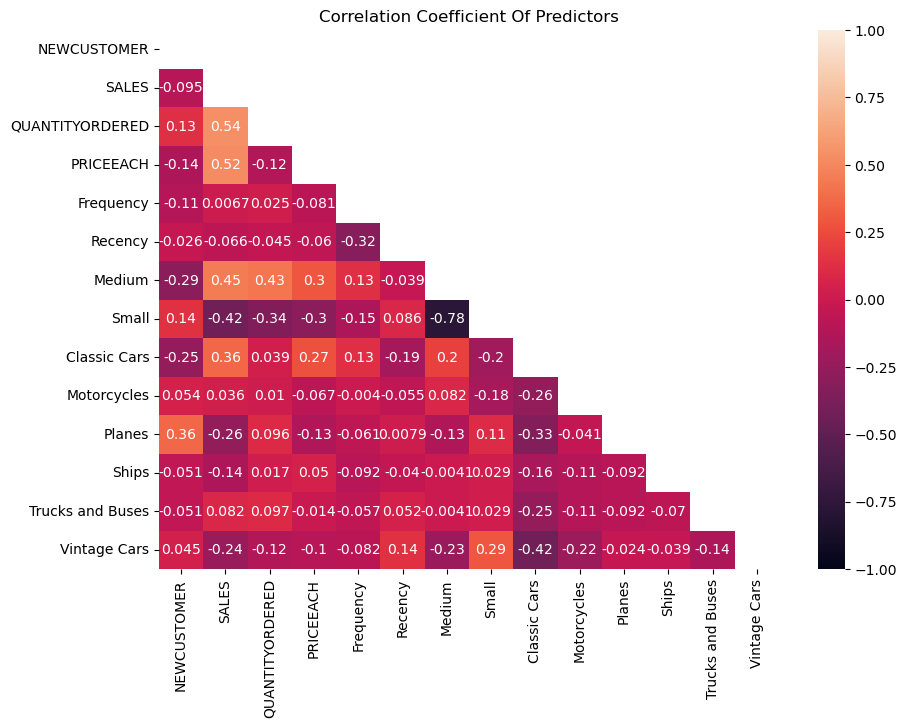

In [313]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(aggregated_df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(aggregated_df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

NEWCUSTOMER


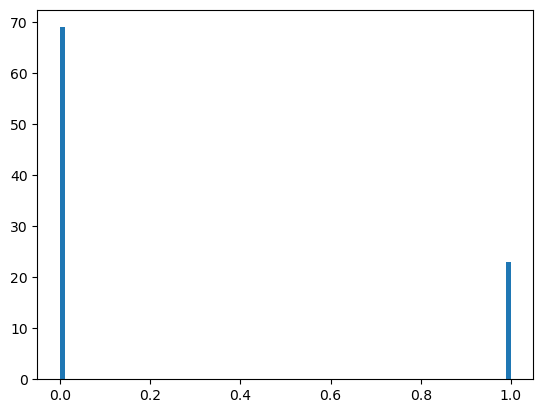

SALES


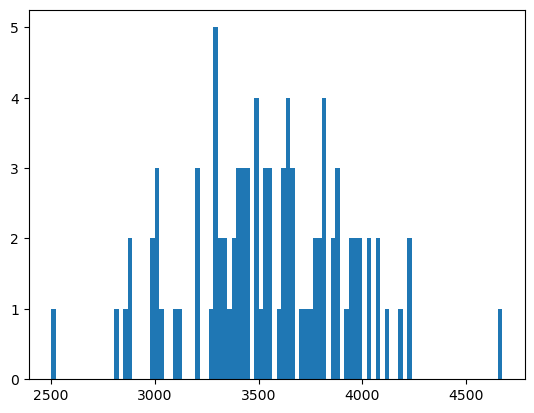

QUANTITYORDERED


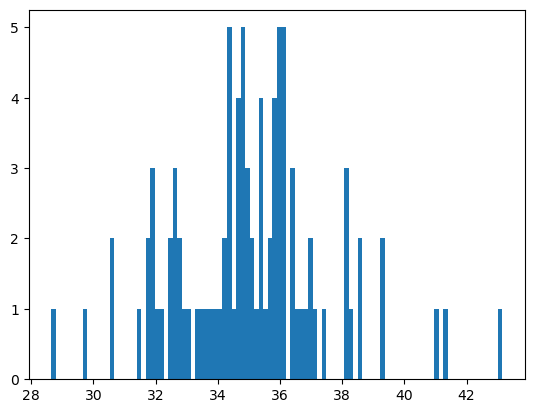

PRICEEACH


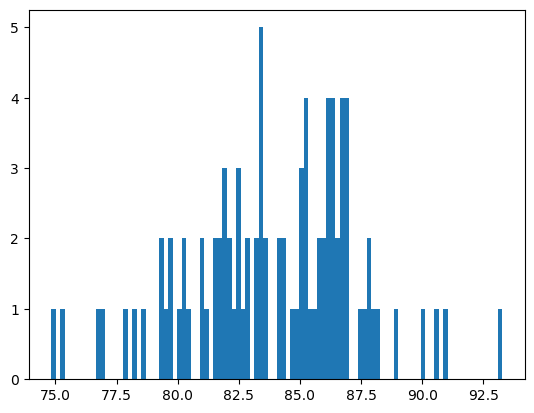

Frequency


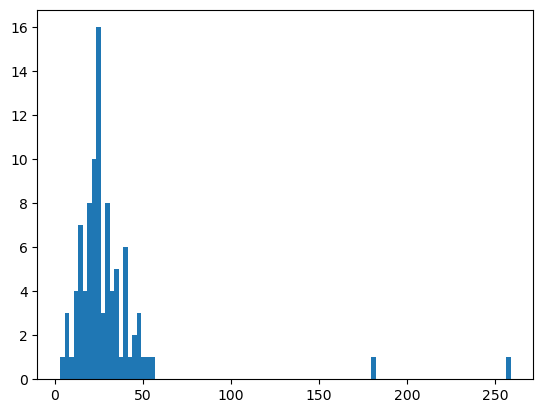

Recency


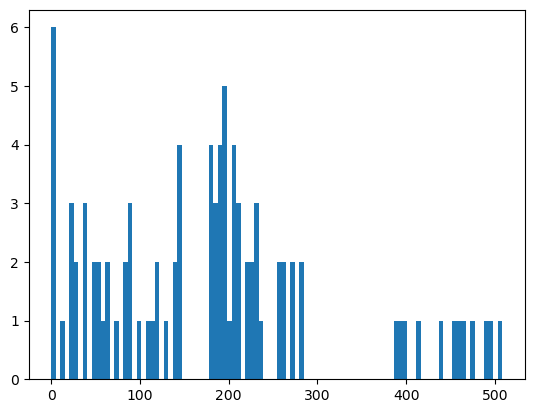

Medium


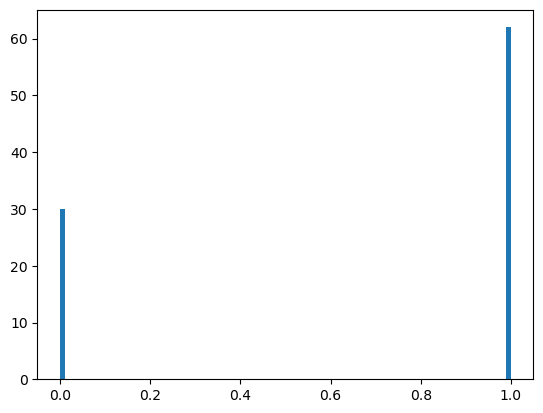

Small


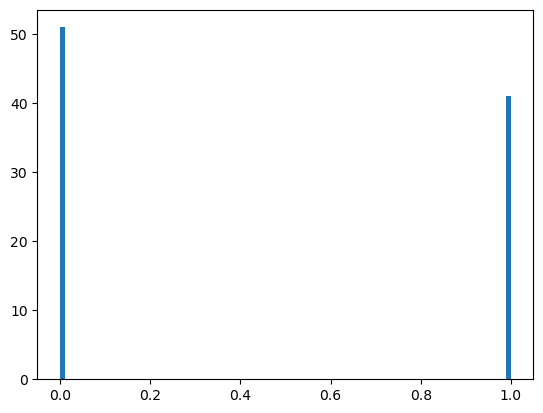

Classic Cars


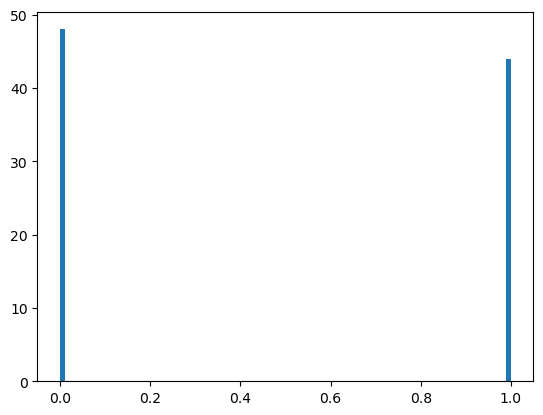

Motorcycles


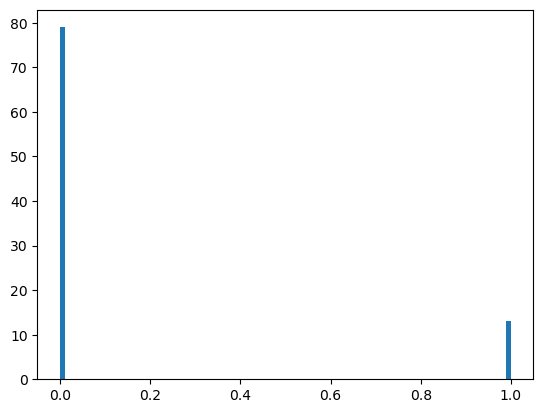

Planes


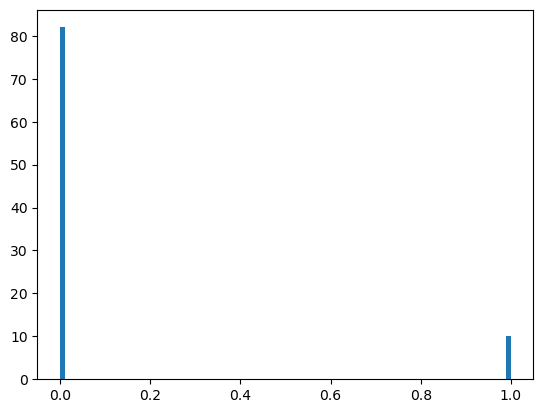

Ships


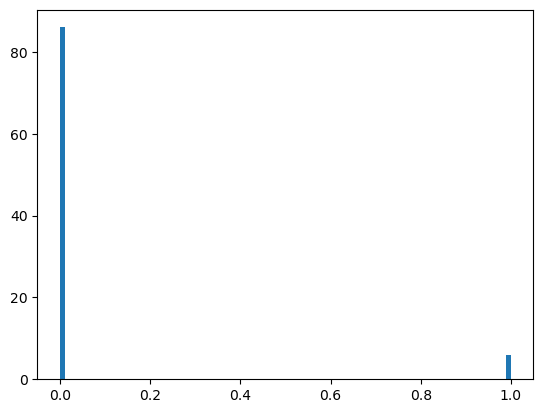

Trucks and Buses


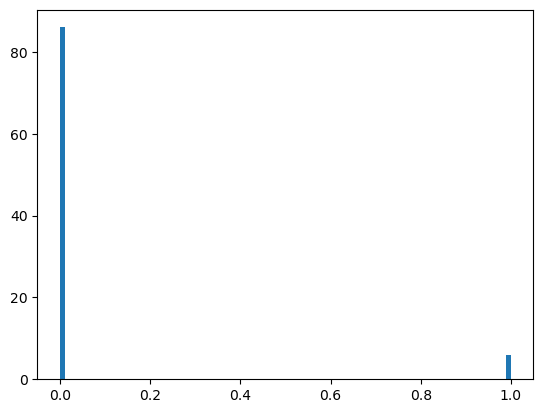

Vintage Cars


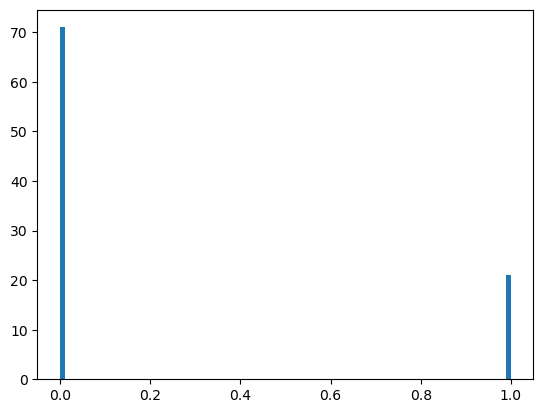

In [314]:
for column in aggregated_df.columns:
    print(column)
    plt.hist(aggregated_df[column],bins=100)
    plt.show()

In [316]:
df_scaled = aggregated_df.copy()

# Extract the columns you want to scale
columns_to_scale = ['NEWCUSTOMER','SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Frequency', 'Recency', 'Medium','Small', 'Classic Cars', 'Motorcycles', 'Planes', 'Ships', 'Trucks and Buses', 'Vintage Cars']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the columns to scale
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

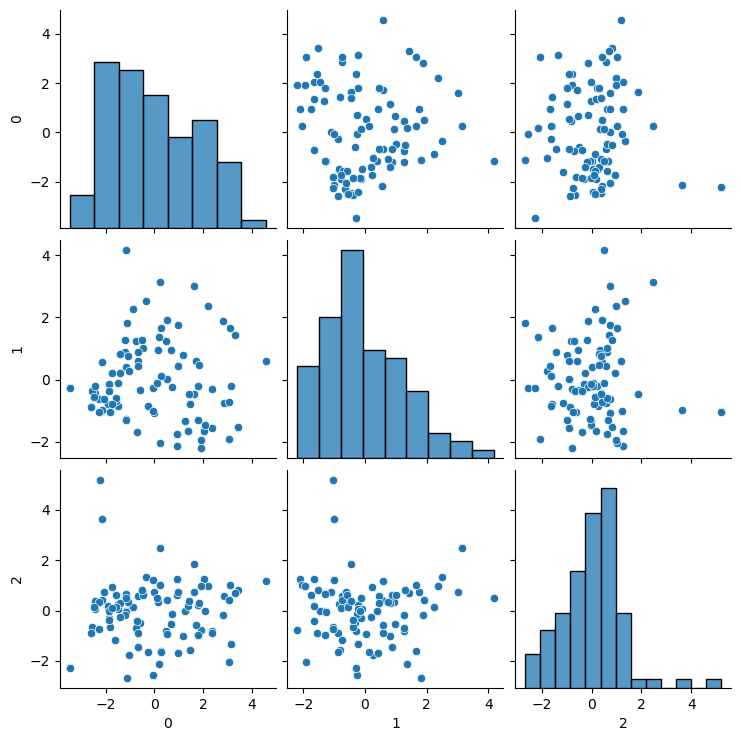

In [317]:
model  = PCA(n_components=3)
pca_transformed  = model.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_transformed)
sns.pairplot(df_pca)

In [320]:
df_transformed = aggregated_df.copy()

# Assuming 'Frequency' and 'Recency' are the column names in your DataFrame
columns_to_transform = ['Frequency', 'Recency']

for column in columns_to_transform:
    new_column_name = f'{column}'
    df_transformed[new_column_name] = np.log(df_transformed[column]+1)

In [321]:
df_scaled = df_transformed.copy()

# Extract the columns you want to scale
columns_to_scale = ['NEWCUSTOMER','SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Frequency', 'Recency', 'Medium','Small', 'Classic Cars', 'Motorcycles', 'Planes', 'Ships', 'Trucks and Buses', 'Vintage Cars']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the columns to scale
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

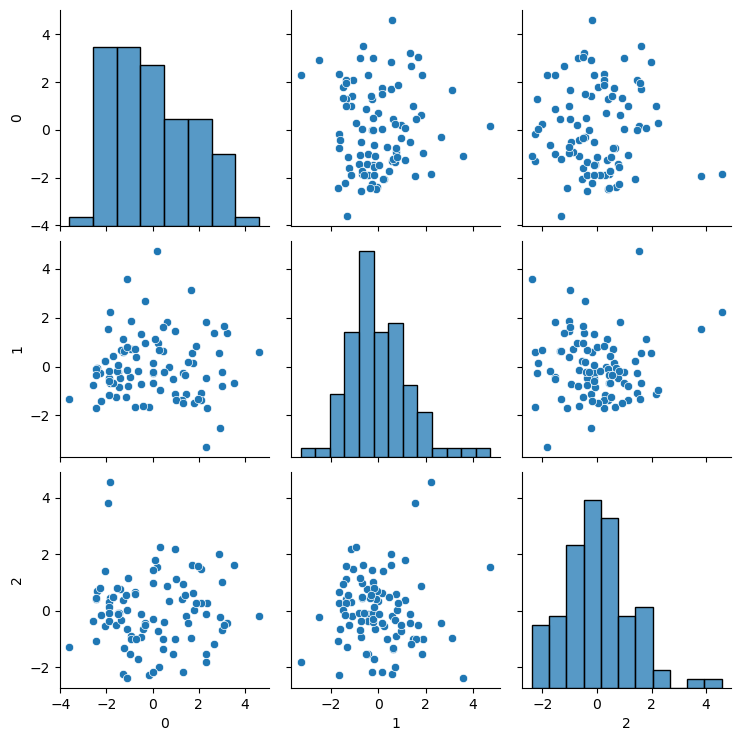

In [322]:
model  = PCA(n_components=3)
pca_transformed  = model.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_transformed)
sns.pairplot(df_pca)

# 3. Segmentation

### 3.1 K-means

In [333]:
clusters = []
inertia = []
sil_score = []

for k in range(2,60): 
    kmeans_model = KMeans(n_clusters=k)
    labels = kmeans_model.fit_predict(df_scaled)
    inertia.append(kmeans_model.inertia_)
    clusters.append(k)
    sil_score.append(silhouette_score(df_scaled, labels))

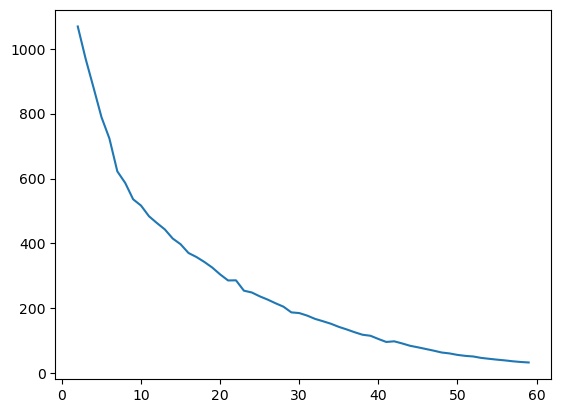

In [334]:
#inertia  plot
plt.plot(clusters, inertia)

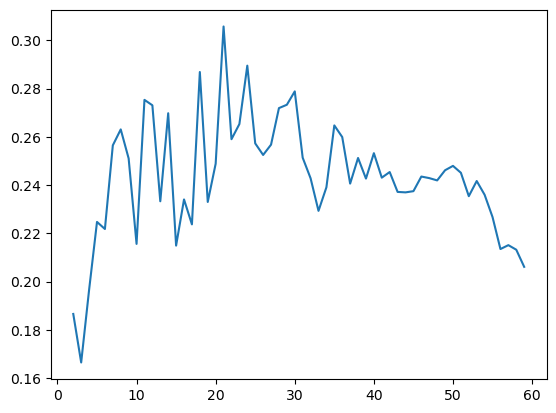

In [335]:
# sil score
plt.plot(clusters, sil_score)

In [352]:
kmeans_model = KMeans(8)
kmeans_labels = kmeans_model.fit_predict(df_scaled)
df_kmeans = aggregated_df.copy()
df_kmeans['kmeans_labels'] = kmeans_labels

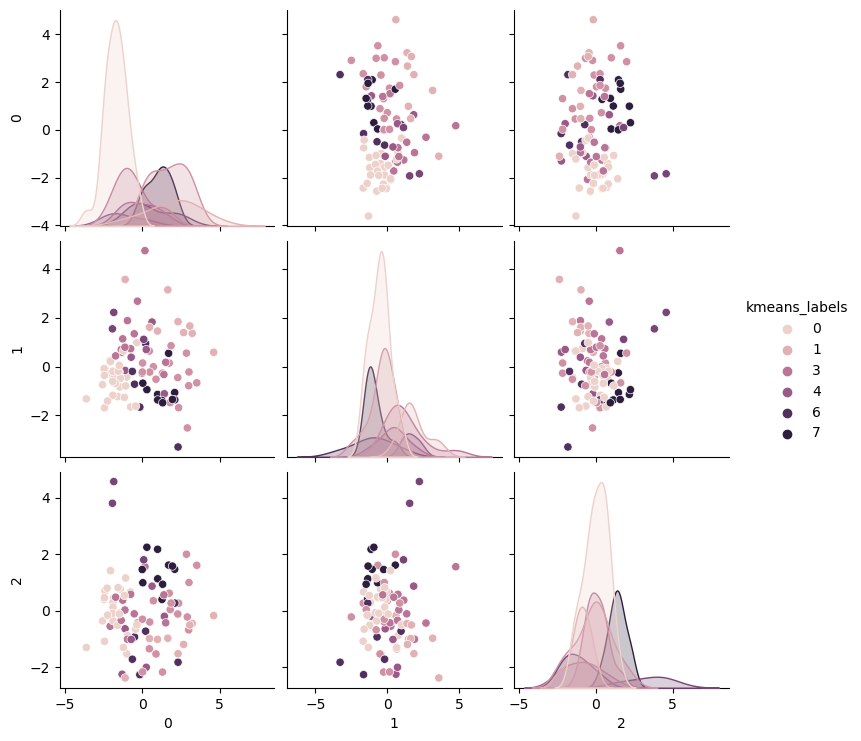

In [353]:
df_pca_kmeans = df_pca.copy()
df_pca_kmeans['kmeans_labels'] = kmeans_labels
sns.pairplot(df_pca_kmeans, hue = 'kmeans_labels')

In [492]:
temp_df = df_kmeans.groupby('kmeans_labels').mean().reset_index()

# Sort the DataFrame by "PaidAmt" in descending order
temp_df= temp_df.sort_values(by='SALES', ascending=False)

# Reorganize the "kmeans_labels" based on the new order
temp_df['kmeans_labels'] = range(len(temp_df))
temp_df

,kmeans_labels,NEWCUSTOMER,SALES,QUANTITYORDERED,PRICEEACH,Frequency,Recency,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trucks and Buses,Vintage Cars
0,0,0.137931,3850.875029,35.845172,86.082364,25.413793,179.896552,0.965517,0.137931,1.000000,0.000000,0.000000,0.0,0.0,0.034483
4,1,0.166667,3667.344844,35.920332,83.760626,24.000000,207.500000,0.666667,0.500000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
3,2,0.250000,3606.961815,34.841552,84.048251,32.083333,160.416667,0.833333,0.166667,0.166667,1.000000,0.083333,0.0,0.0,0.000000
5,3,0.000000,3485.164240,35.394199,82.660518,161.666667,1.333333,1.000000,0.000000,0.666667,0.000000,0.000000,0.0,0.0,0.333333
6,4,0.166667,3351.439772,35.192312,84.580421,20.000000,161.833333,0.666667,0.500000,0.166667,0.000000,0.000000,1.0,0.0,0.166667
2,5,0.294118,3348.686336,34.021229,82.975088,25.764706,245.000000,0.470588,0.764706,0.000000,0.000000,0.058824,0.0,0.0,1.000000
7,6,0.200000,3292.858907,32.946350,81.979227,31.200000,132.300000,0.200000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
1,7,0.777778,3260.417903,36.074346,80.970887,22.444444,208.666667,0.333333,0.666667,0.000000,0.111111,0.888889,0.0,0.0,0.111111


In [493]:
import plotly.express as px

# Exclude 'kmeans_labels' from the list of metrics
metrics = temp_df.columns[1:]

# Create separate bar plots for each metric with gradients of blues
for metric in metrics:
    fig = px.bar(temp_df, x='kmeans_labels', y=metric,
                 labels={'kmeans_labels': 'Segment', metric: f'Average per day {metric}'},
                 title=f'2024 {metric}')

    # Define a custom color scale ranging from dark to light blue
    num_segments = len(temp_df['kmeans_labels'].unique())
    colors = px.colors.sequential.Inferno[::-1]  # Reverse the default Blues color scale
   
    # Assign colors to segments based on their order
    segment_colors = {label: colors[i % len(colors)] for i, label in enumerate(temp_df['kmeans_labels'].unique())}
   
    fig.update_traces(marker=dict(
       color=[segment_colors[label] for label in temp_df['kmeans_labels']]
    ))
    # Update the y-axis title for the 'PlayerCount' column
    if metric == 'PlayerCount':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'CRM_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'NetWin_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'Frequency%WA':
        fig.update_yaxes(title=f'Weighted Average per day', tickfont=dict(size=20), tickformat='.0%')
    else:
        fig.update_yaxes(title=f'Average per day {metric}', tickfont=dict(size=20))
    # Set the background color of the entire plot
    fig.update_layout(plot_bgcolor='lightgray', font=dict(size=20))
     # Remove decimals from x-axis labels
    fig.update_xaxes(type='category', categoryorder='category ascending', tickfont=dict(size=20))
    fig.show()

### 3.2 DBSCAN

In [420]:
clusters = []
sil_score = []
epsilons = list(np.arange(2.2, 5.1, 0.1)
               )

for k in epsilons: 
    dbscan_model = DBSCAN(eps=k)
    labels = dbscan_model.fit_predict(df_scaled)
    cluster =  sum(np.unique(labels)!=-1)
    clusters.append(cluster)
    sil_score.append(silhouette_score(df_scaled, labels))

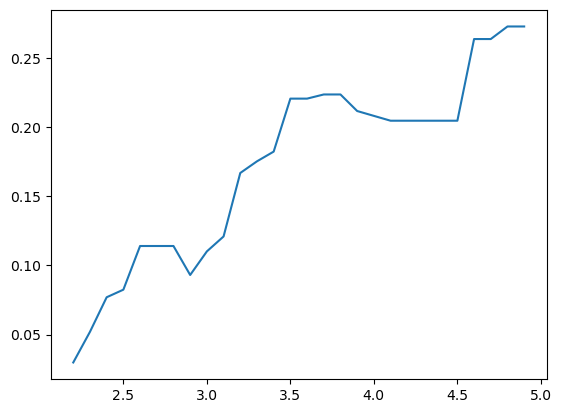

In [365]:
plt.plot(epsilons, sil_score)

In [475]:
clusters2 = []
sil_score2 = []
epsilons2 = 2.6
samples2 = list(range(2, 20))

for k in samples2: 
    dbscan_model2 = DBSCAN(eps = epsilons2 , min_samples = k)
    labels2 = dbscan_model2.fit_predict(df_scaled)
    cluster2 =  sum(np.unique(labels2)!=-1)
    clusters2.append(cluster2)
    sil_score2.append(silhouette_score(df_scaled, labels2))

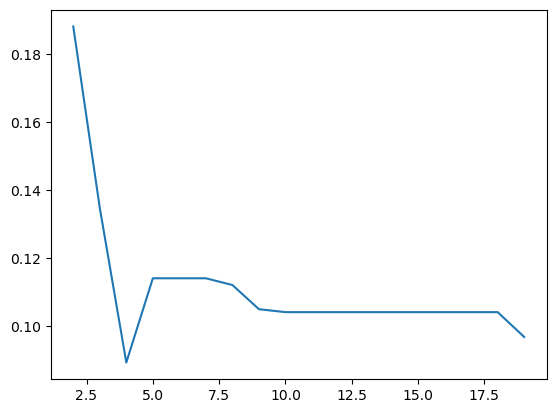

In [476]:
plt.plot(samples2, sil_score2)

In [479]:
dbscan_model = DBSCAN(eps= 2.6, min_samples=2.5)
dbscan_labels = dbscan_model.fit_predict(df_scaled)
df_dbscan = aggregated_df.copy()
df_dbscan['dbscan_labels'] = dbscan_labels

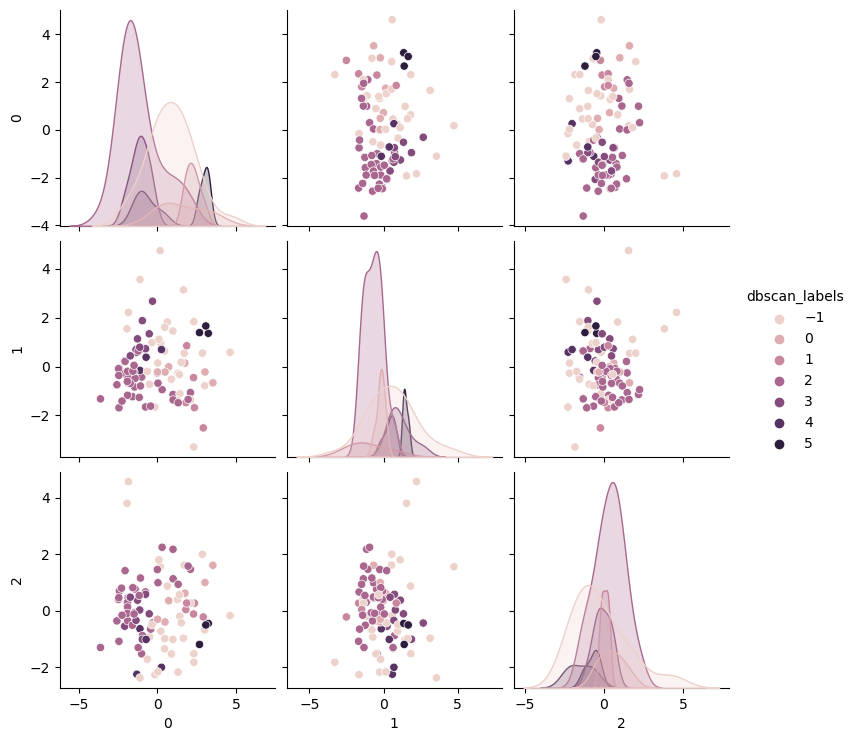

In [480]:
df_pca_dbscan = df_pca.copy()
df_pca_dbscan['dbscan_labels'] = dbscan_labels
sns.pairplot(df_pca_dbscan, hue = 'dbscan_labels')

In [494]:
temp_df = df_dbscan.groupby('dbscan_labels').mean().reset_index()

# Sort the DataFrame by "PaidAmt" in descending order
temp_df= temp_df.sort_values(by='SALES', ascending=False)

# Reorganize the "kmeans_labels" based on the new order
temp_df['dbscan_labels'] = range(len(temp_df))

temp_df

,dbscan_labels,NEWCUSTOMER,SALES,QUANTITYORDERED,PRICEEACH,Frequency,Recency,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trucks and Buses,Vintage Cars
3,0,0.083333,3709.785716,35.083754,85.226482,27.166667,172.166667,0.833333,0.305556,1.000000,0.000000,0.000000,0.000000,0.000000,0.027778
5,1,0.000000,3661.044539,36.932185,82.628886,22.750000,255.750000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,2,0.222222,3656.743095,35.233621,84.499707,31.888889,139.222222,1.000000,0.000000,0.222222,1.000000,0.000000,0.000000,0.000000,0.000000
0,3,0.448276,3431.842016,35.285724,82.926511,36.103448,170.517241,0.517241,0.551724,0.206897,0.137931,0.241379,0.206897,0.068966,0.310345
2,4,0.400000,3430.033858,32.574496,85.620621,22.400000,244.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,5,0.000000,3281.051445,34.392603,80.430370,39.333333,196.666667,0.666667,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
6,6,1.000000,3086.695910,34.200000,82.460590,24.000000,302.666667,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [495]:
import plotly.express as px

# Exclude 'kmeans_labels' from the list of metrics
metrics = temp_df.columns[1:]

# Create separate bar plots for each metric with gradients of blues
for metric in metrics:
    fig = px.bar(temp_df, x='dbscan_labels', y=metric,
                 labels={'dbscan_labels': 'Segment', metric: f'Average per day {metric}'},
                 title=f'2024 {metric}')

    # Define a custom color scale ranging from dark to light blue
    num_segments = len(temp_df['dbscan_labels'].unique())
    colors = px.colors.sequential.Inferno[::-1]  # Reverse the default Blues color scale
   
    # Assign colors to segments based on their order
    segment_colors = {label: colors[i % len(colors)] for i, label in enumerate(temp_df['dbscan_labels'].unique())}
   
    fig.update_traces(marker=dict(
       color=[segment_colors[label] for label in temp_df['dbscan_labels']]
    ))
    # Update the y-axis title for the 'PlayerCount' column
    if metric == 'PlayerCount':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'CRM_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'NetWin_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'Frequency%WA':
        fig.update_yaxes(title=f'Weighted Average per day', tickfont=dict(size=20), tickformat='.0%')
    else:
        fig.update_yaxes(title=f'Average per day {metric}', tickfont=dict(size=20))
    # Set the background color of the entire plot
    fig.update_layout(plot_bgcolor='lightgray', font=dict(size=20))
     # Remove decimals from x-axis labels
    fig.update_xaxes(type='category', categoryorder='category ascending', tickfont=dict(size=20))
    fig.show()

### 3.3 Agglomerative

In [490]:
clusters3 = []
sil_scores3 = []
for i in range(2,50):
    model = AgglomerativeClustering(i, linkage="ward")
    clusters3.append(i)
    sil_scores3.append(silhouette_score(df_scaled,  model.fit_predict(df_scaled)))

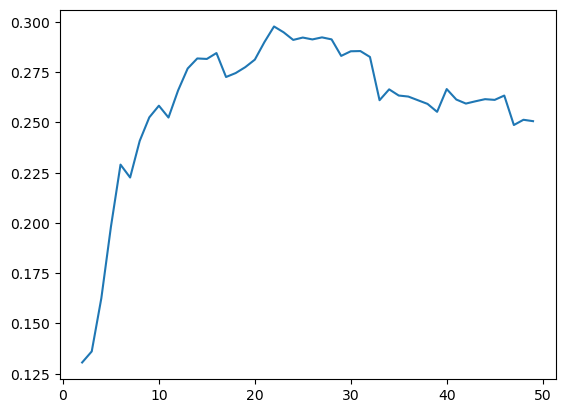

In [491]:
plt.plot(clusters3, sil_scores3)

In [496]:
agg_model = AgglomerativeClustering(9)
agg_labels = agg_model.fit_predict(df_scaled)
df_agg = aggregated_df.copy()
df_agg['agg_labels'] = agg_labels

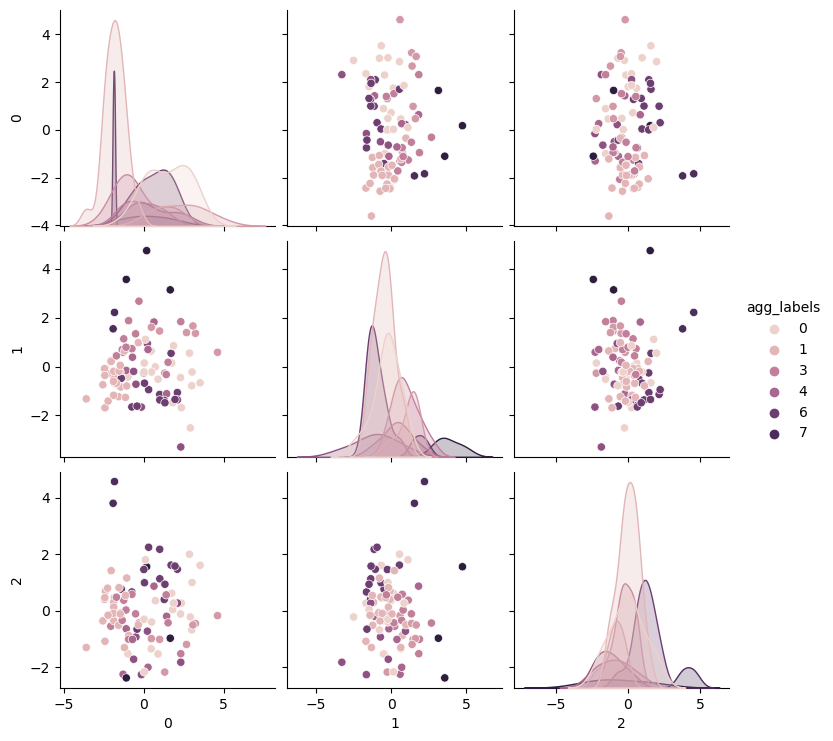

In [497]:
df_pca_agg = df_pca.copy()
df_pca_agg['agg_labels'] = agg_labels
sns.pairplot(df_pca_agg, hue = 'agg_labels')

In [498]:
temp_df = df_agg.groupby('agg_labels').mean().reset_index()

# Sort the DataFrame by "PaidAmt" in descending order
temp_df= temp_df.sort_values(by='SALES', ascending=False)

# Reorganize the "kmeans_labels" based on the new order
temp_df['agg_labels'] = range(len(temp_df))

temp_df

,agg_labels,NEWCUSTOMER,SALES,QUANTITYORDERED,PRICEEACH,Frequency,Recency,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trucks and Buses,Vintage Cars
1,0,0.160000,3879.500411,35.857504,86.250039,26.560000,171.000000,0.960000,0.040000,1.000000,0.000000,0.0,0.0,0.0,0.040000
8,1,1.000000,3787.362304,39.702965,83.401200,38.000000,32.333333,0.666667,0.333333,0.000000,0.333333,1.0,0.0,0.0,0.333333
4,2,0.166667,3667.344844,35.920332,83.760626,24.000000,207.500000,0.666667,0.500000,0.000000,0.000000,0.0,0.0,1.0,0.000000
3,3,0.250000,3599.954313,35.136049,83.371522,28.500000,177.833333,0.750000,0.250000,0.166667,1.000000,0.0,0.0,0.0,0.000000
7,4,0.000000,3580.235707,35.689125,82.575233,219.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000
6,5,0.153846,3397.090356,33.381881,83.088778,29.076923,159.846154,0.384615,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000
0,6,0.277778,3353.725640,34.214537,82.394072,26.833333,231.944444,0.500000,0.666667,0.055556,0.000000,0.0,0.0,0.0,0.944444
5,7,0.166667,3351.439772,35.192312,84.580421,20.000000,161.833333,0.666667,0.500000,0.166667,0.000000,0.0,1.0,0.0,0.166667
2,8,0.571429,3053.667391,33.985894,82.392163,19.857143,250.142857,0.428571,0.714286,0.000000,0.000000,1.0,0.0,0.0,0.142857


In [499]:
import plotly.express as px

# Exclude 'kmeans_labels' from the list of metrics
metrics = temp_df.columns[1:]

# Create separate bar plots for each metric with gradients of blues
for metric in metrics:
    fig = px.bar(temp_df, x='agg_labels', y=metric,
                 labels={'agg_labels': 'Segment', metric: f'Average per day {metric}'},
                 title=f'2024 {metric}')

    # Define a custom color scale ranging from dark to light blue
    num_segments = len(temp_df['agg_labels'].unique())
    colors = px.colors.sequential.Inferno[::-1]  # Reverse the default Blues color scale
   
    # Assign colors to segments based on their order
    segment_colors = {label: colors[i % len(colors)] for i, label in enumerate(temp_df['agg_labels'].unique())}
   
    fig.update_traces(marker=dict(
       color=[segment_colors[label] for label in temp_df['agg_labels']]
    ))
    # Update the y-axis title for the 'PlayerCount' column
    if metric == 'PlayerCount':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'CRM_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'NetWin_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'Frequency%WA':
        fig.update_yaxes(title=f'Weighted Average per day', tickfont=dict(size=20), tickformat='.0%')
    else:
        fig.update_yaxes(title=f'Average per day {metric}', tickfont=dict(size=20))
    # Set the background color of the entire plot
    fig.update_layout(plot_bgcolor='lightgray', font=dict(size=20))
     # Remove decimals from x-axis labels
    fig.update_xaxes(type='category', categoryorder='category ascending', tickfont=dict(size=20))
    fig.show()

### 3.4 Gausian Mixture

In [513]:
components4 = []
sil_score4 = []

for k in range(2,10): 
    gm_model = GaussianMixture(n_components=k)
    components_labels = gm_model.fit_predict(df_scaled)
    components4.append(k)
    sil_score4.append(silhouette_score(df_scaled, components_labels))

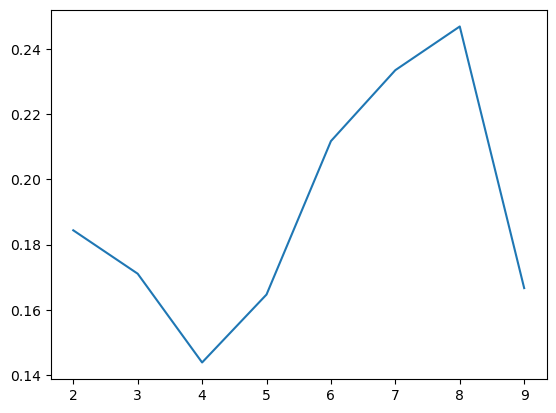

In [514]:
plt.plot(components4, sil_score4)

In [511]:
gm_model = GaussianMixture(8)
gm_labels = gm_model.fit_predict(df_scaled)
df_gm = aggregated_df.copy()
df_gm['gm_labels'] = gm_labels

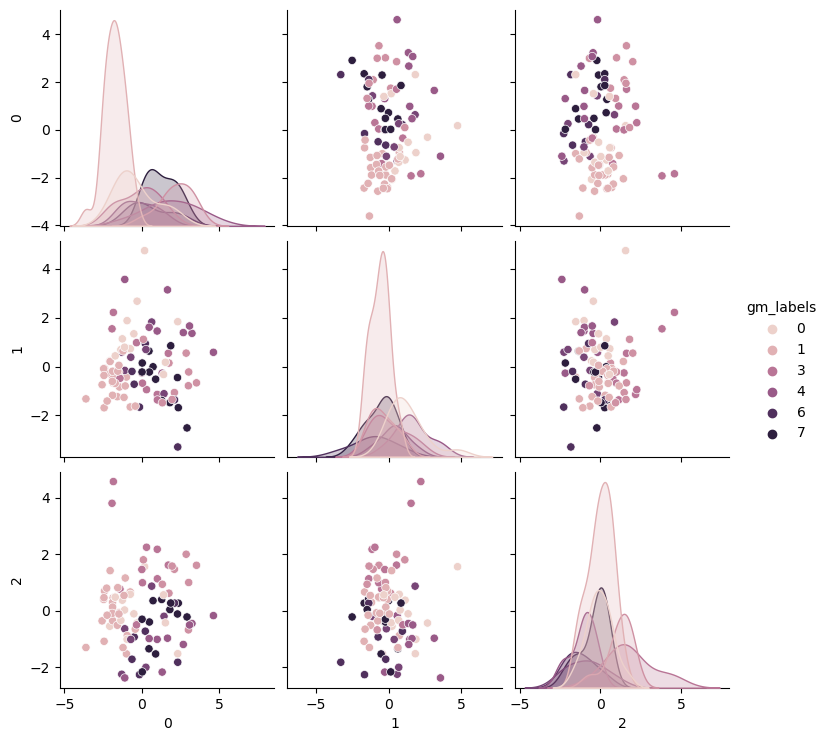

In [512]:
df_pca_gm = df_pca.copy()
df_pca_gm['gm_labels'] = gm_labels
sns.pairplot(df_pca_gm, hue = 'gm_labels')

In [515]:
temp_df = df_gm.groupby('gm_labels').mean().reset_index()

# Sort the DataFrame by "PaidAmt" in descending order
temp_df= temp_df.sort_values(by='SALES', ascending=False)

# Reorganize the "kmeans_labels" based on the new order
temp_df['gm_labels'] = range(len(temp_df))

temp_df

,gm_labels,NEWCUSTOMER,SALES,QUANTITYORDERED,PRICEEACH,Frequency,Recency,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trucks and Buses,Vintage Cars
1,0,0.111111,3828.369630,35.644073,86.224098,25.666667,190.518519,1.000000,0.074074,1.000000,0.0,0.000000,0.0,0.0,0.037037
5,1,0.166667,3667.344844,35.920332,83.760626,24.000000,207.500000,0.666667,0.500000,0.000000,0.0,0.000000,0.0,1.0,0.000000
0,2,0.307692,3584.464214,35.092202,83.374540,30.384615,164.153846,0.769231,0.230769,0.153846,1.0,0.076923,0.0,0.0,0.000000
3,3,0.200000,3563.673871,35.035060,82.871932,70.100000,53.000000,0.500000,0.800000,1.000000,0.0,0.000000,0.0,0.0,0.000000
7,4,0.416667,3508.671916,33.926192,84.216298,23.666667,279.083333,0.500000,0.666667,0.083333,0.0,0.000000,0.0,0.0,0.916667
6,5,0.166667,3351.439772,35.192312,84.580421,20.000000,161.833333,0.666667,0.500000,0.166667,0.0,0.000000,1.0,0.0,0.166667
4,6,0.666667,3259.908403,35.827124,82.615331,22.222222,205.333333,0.444444,0.666667,0.000000,0.0,1.000000,0.0,0.0,0.222222
2,7,0.111111,3063.381789,33.087454,79.698146,31.777778,167.444444,0.222222,0.888889,0.333333,0.0,0.000000,0.0,0.0,0.666667


In [517]:
import plotly.express as px

# Exclude 'kmeans_labels' from the list of metrics
metrics = temp_df.columns[1:]

# Create separate bar plots for each metric with gradients of blues
for metric in metrics:
    fig = px.bar(temp_df, x='gm_labels', y=metric,
                 labels={'gm_labels': 'Segment', metric: f'Average per day {metric}'},
                 title=f'2024 {metric}')

    # Define a custom color scale ranging from dark to light blue
    num_segments = len(temp_df['gm_labels'].unique())
    colors = px.colors.sequential.Inferno[::-1]  # Reverse the default Blues color scale
   
    # Assign colors to segments based on their order
    segment_colors = {label: colors[i % len(colors)] for i, label in enumerate(temp_df['gm_labels'].unique())}
   
    fig.update_traces(marker=dict(
       color=[segment_colors[label] for label in temp_df['gm_labels']]
    ))
    # Update the y-axis title for the 'PlayerCount' column
    if metric == 'PlayerCount':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'CRM_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'NetWin_sum':
        fig.update_yaxes(title=f'Full-period {metric}', tickfont=dict(size=20))
    elif metric == 'Frequency%WA':
        fig.update_yaxes(title=f'Weighted Average per day', tickfont=dict(size=20), tickformat='.0%')
    else:
        fig.update_yaxes(title=f'Average per day {metric}', tickfont=dict(size=20))
    # Set the background color of the entire plot
    fig.update_layout(plot_bgcolor='lightgray', font=dict(size=20))
     # Remove decimals from x-axis labels
    fig.update_xaxes(type='category', categoryorder='category ascending', tickfont=dict(size=20))
    fig.show()

# 4. Output in CSV

In [ ]:
# Make a copy of the desired df
df_to_csv=df_kmeans.copy()
df_to_csv = df_to_csv.reset_index()

# Specify the path where you want to save the CSV file
csv_file_path = 'segments_average.csv'

# Export the DataFrame to a CSV file
df_to_csv.to_csv(csv_file_path, index=False)